In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset


In [4]:
df = pd.read_csv('House Price.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
df.shape

(2000, 10)

In [7]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [8]:
print(df.columns)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


#Exploratory Data Analysis

# Pie Plot

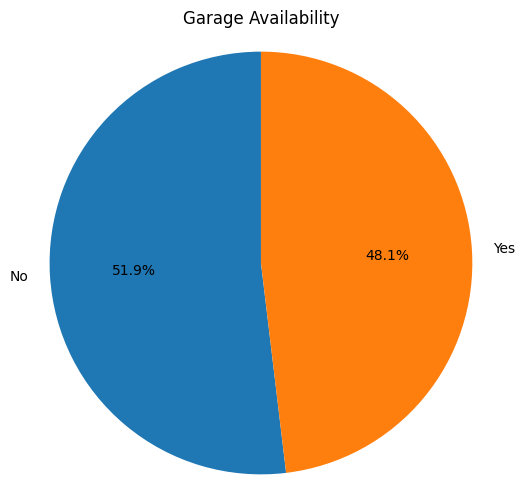

In [9]:
garage_counts = df['Garage'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(garage_counts, labels=garage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Garage Availability")
plt.axis('equal')
plt.show()


# Bar Plot

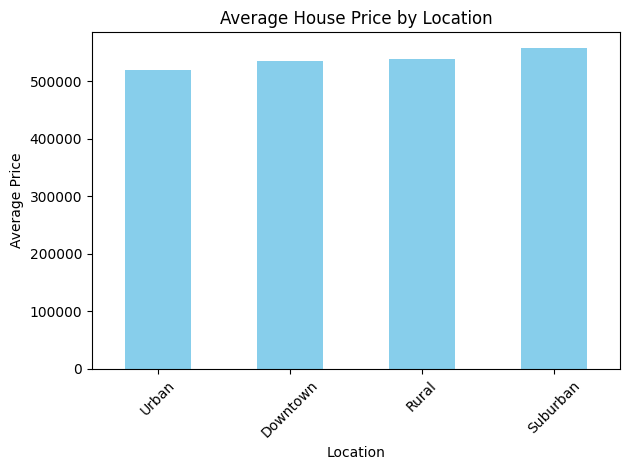

In [10]:
avg_price_by_location = df.groupby('Location')['Price'].mean().sort_values()
avg_price_by_location.plot(kind='bar', color='skyblue')
plt.title("Average House Price by Location")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Histogram

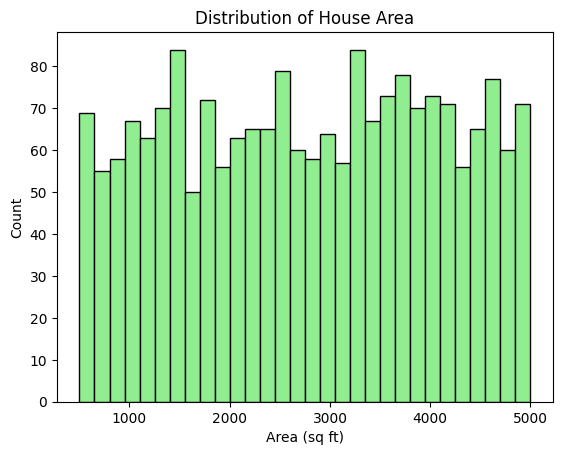

In [15]:
plt.hist(df['Area'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of House Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Count")
plt.show()


# Scatter Plot Area vs Price

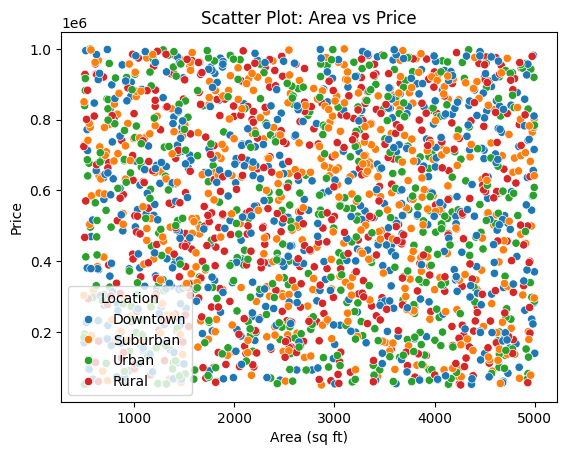

In [18]:
sns.scatterplot(x='Area', y='Price', data=df, hue='Location')
plt.title("Scatter Plot: Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()


# Box Plot By Condition

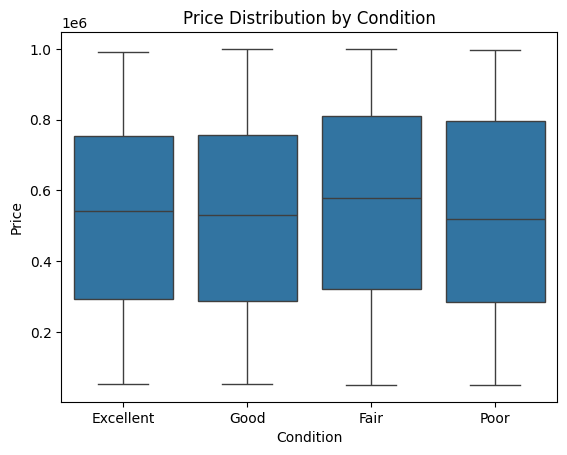

In [19]:
sns.boxplot(x='Condition', y='Price', data=df)
plt.title("Price Distribution by Condition")
plt.show()


# Count Plot: Houses by Location

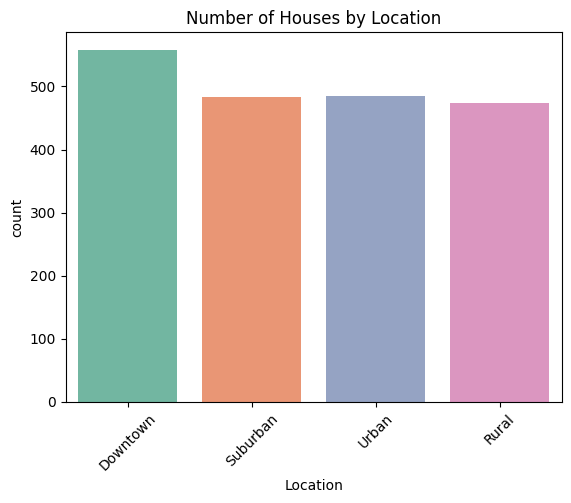

In [20]:
sns.countplot(x='Location', data=df, palette='Set2')
plt.title("Number of Houses by Location")
plt.xticks(rotation=45)
plt.show()


# Pair Plot: Selected Numerical Features

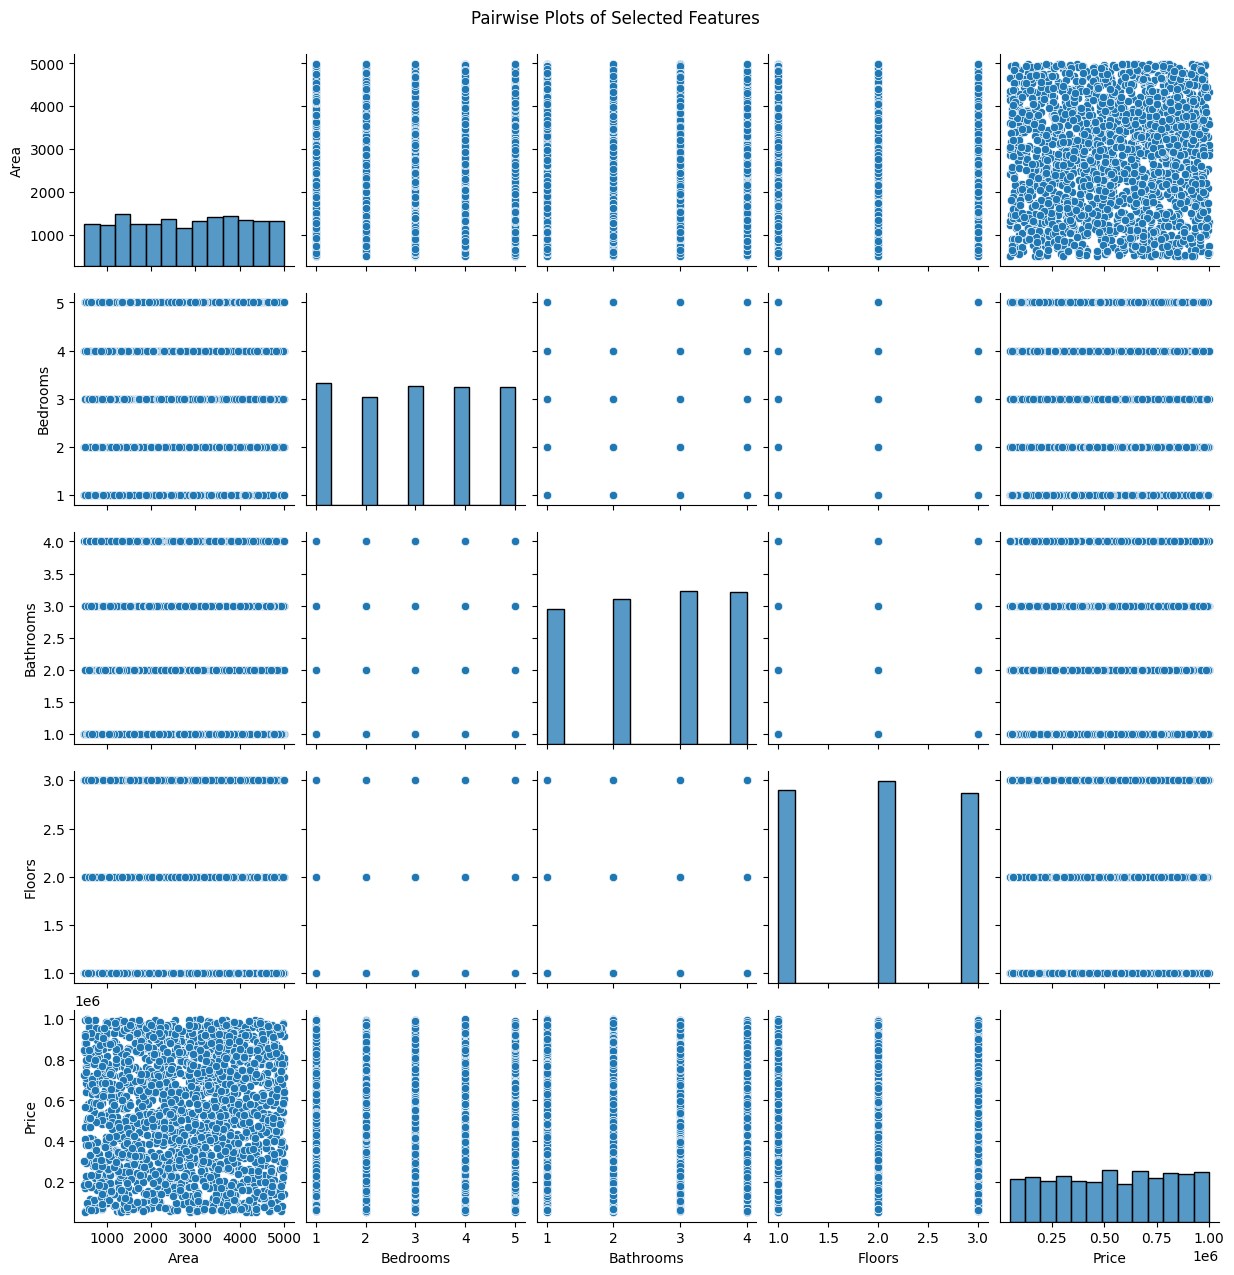

In [21]:
selected_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'Price']
sns.pairplot(df[selected_columns])
plt.suptitle("Pairwise Plots of Selected Features", y=1.02)
plt.show()


## Heat Map: Correlation Matrix

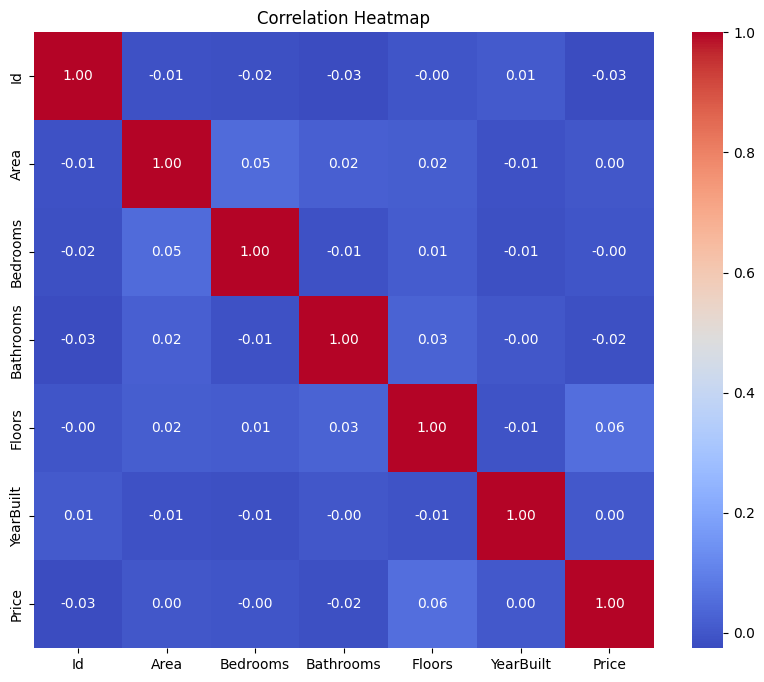

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Data Preprocessing


In [26]:
# Features and target
X = df.drop(['Id', 'Price'], axis=1)
y = df['Price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Corrected the indentation here

# Machine Learning algorithm

# Ridge and Lasso

Ridge → RMSE: 280577.07, R²: -0.01
Lasso → RMSE: 280578.60, R²: -0.01


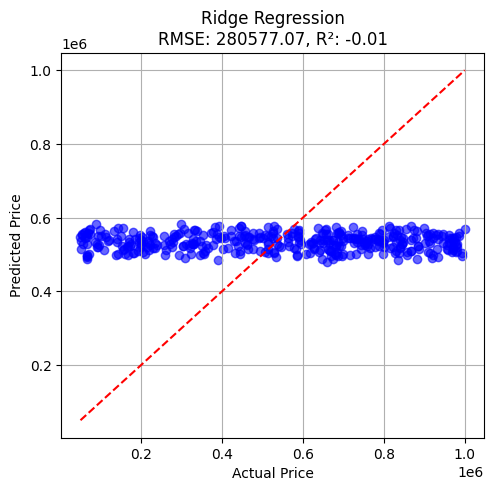

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)

# Print accuracy
print(f"Ridge → RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")
print(f"Lasso → RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")

# Plot predictions
plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_preds, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Ridge Regression\nRMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

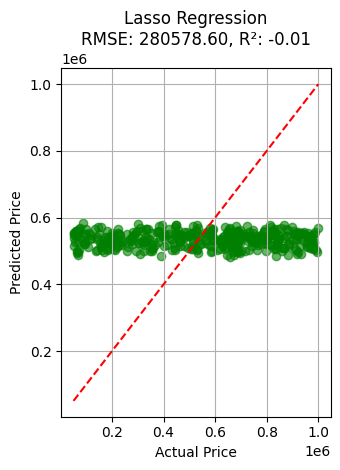

In [36]:
# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_preds, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Lasso Regression\nRMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Decision Tree Regression

Decision Tree RMSE: 292201.2
Decision Tree R²: -0.1


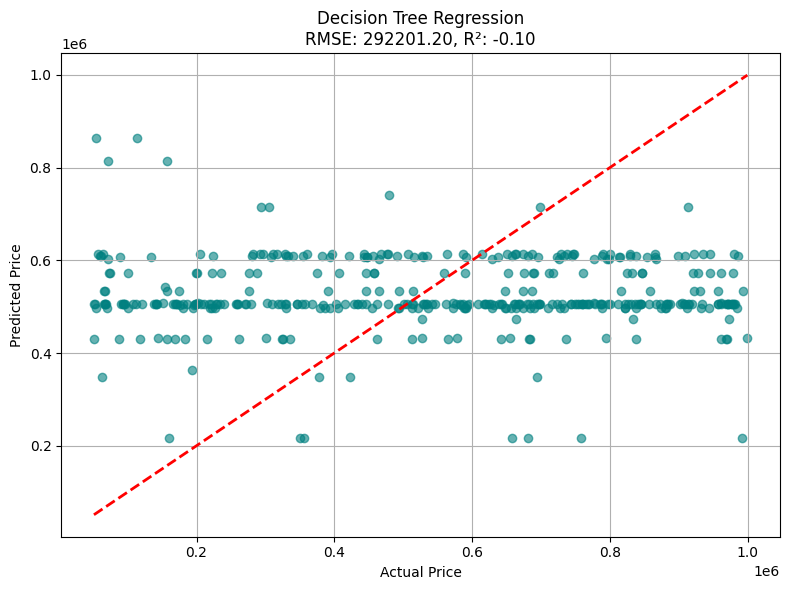

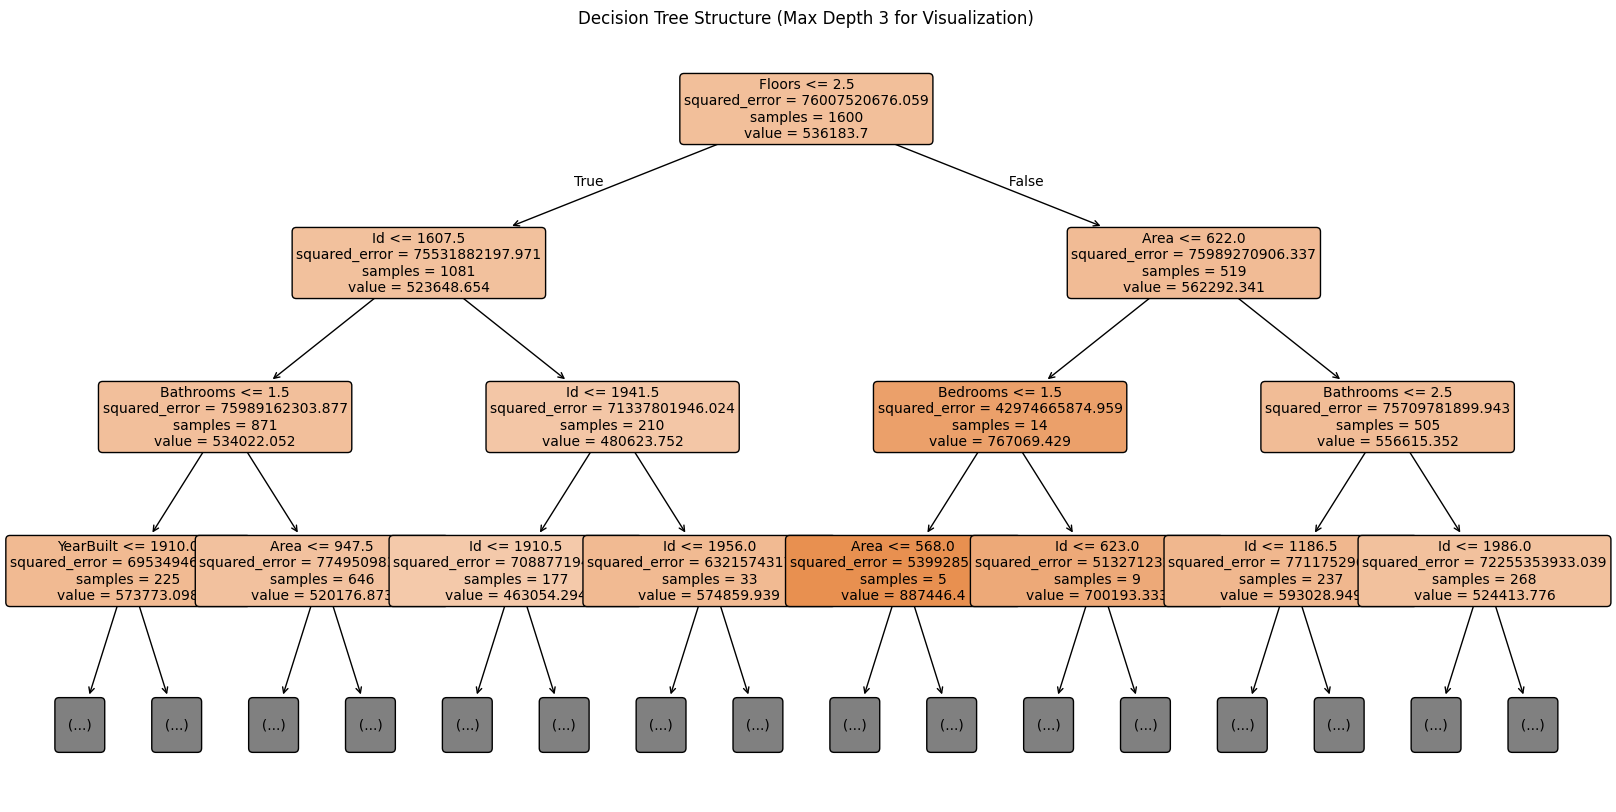

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
preds = tree.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

# Print accuracy metrics
print("Decision Tree RMSE:", round(rmse, 2))
print("Decision Tree R²:", round(r2, 2))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Decision Tree Regression\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Import plot_tree
from sklearn.tree import plot_tree # Importing the necessary function

# Plot Decision Tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,    # Control depth for clearer visualization (optional)
          fontsize=10)
plt.title("Decision Tree Structure (Max Depth 3 for Visualization)")
plt.show()

#XGBoost Regression


XGBoost RMSE: 293715.13
XGBoost R²: -0.11


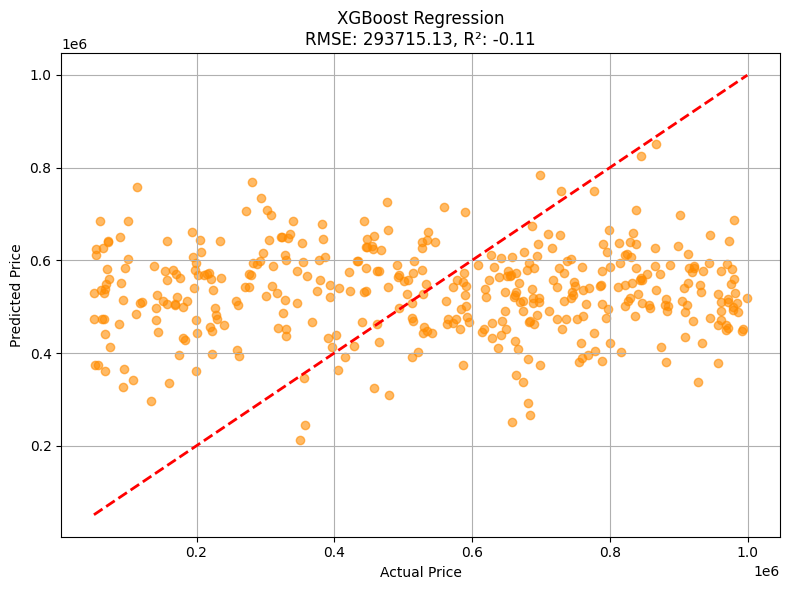

In [39]:
from xgboost import XGBRegressor
# Train the XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

# Accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

# Print accuracy
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R²: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"XGBoost Regression\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest Regression

Random Forest RMSE: 293715.13
Random Forest R²: -0.11


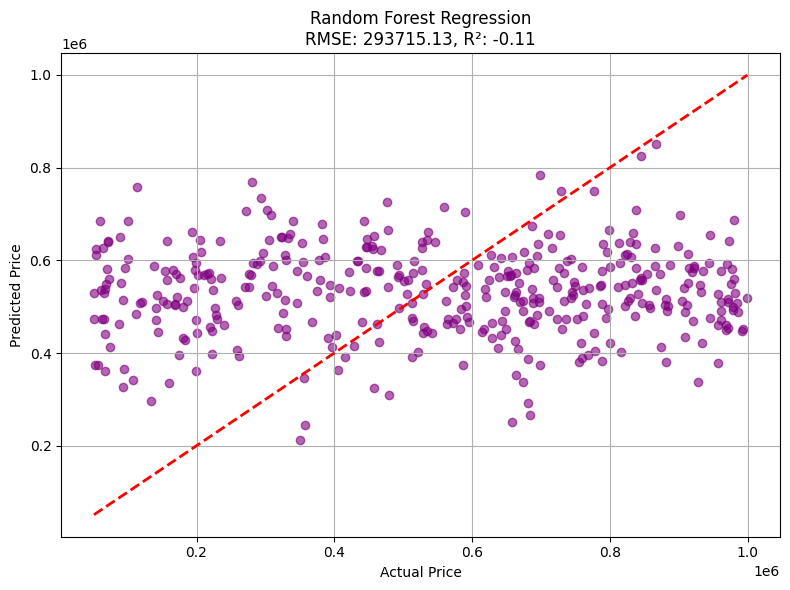

In [40]:
from sklearn.ensemble import RandomForestRegressor
# Accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

# Print accuracy
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Random Forest Regression\nRMSE: {rmse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Over all accuracy

In [43]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate using cross-validation
print("Model Performance with 5-Fold Cross-Validation (R² Scores):\n")
for name, model in models.items():
    # For Ridge & Lasso use scaled features
    if name in ["Ridge", "Lasso"]:
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    else:
        scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    print(f"{name}: Mean R² = {scores.mean():.3f}, Std = {scores.std():.3f}")

Model Performance with 5-Fold Cross-Validation (R² Scores):

Ridge: Mean R² = -0.006, Std = 0.008
Lasso: Mean R² = -0.006, Std = 0.008
Decision Tree: Mean R² = -0.058, Std = 0.033
Random Forest: Mean R² = -0.075, Std = 0.026
XGBoost: Mean R² = -0.131, Std = 0.020
